# Case: Participação no PIB (%)
Qual foi a variação do PIB relativo à indústria nas regiões do Brasil nos anos de 2010, 2015 e 2020?

**Pergunta 1** - As industrias de qual região tem maior participação no PIB?

**Pergunta 2** - Houve alguma região que superou outra com sua participação no PIB?

## Variáveis de interesse
Os dados necessários para a análise são Região e Ano, para isso, é importante saber como obter o valor correto de cada variável.


### Variável - Região
A variável região já foi dividida com o percentual de participal de cada região distinta, somando 100% por linha.

### Variável - Ano
Vamos obter os valores exclusivos da variável ano para agrupar da participação de todas as indústrias por região.

### Gráfico
O objetivo da análise e verificar a variação temporal da participação das industrias por região no PIB, então um gráfico de linhas é ideal.

# Resultado
### 1. O sudoeste é responsável por 52% do PIB
### 2. O Norte superou o Centro-Oeste em participação no PIB
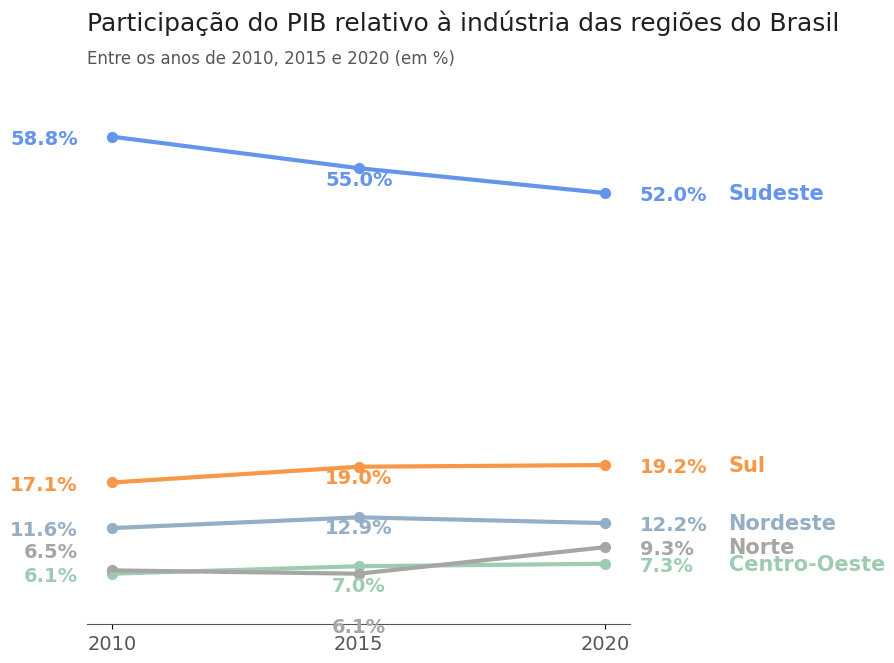


In [ ]:
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, CINZA6, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#CED4DA' , '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7', '#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040', '#9ABB59', '#9ECCB3'

In [ ]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Importando a base de dados do PIB de 2002 a 2020
df_pib = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/main/dados/pib_br_2002_2020_estados.csv")

# Selecionando os dados desejados
anos = [2010, 2015, 2020]
df_pib = df_pib.query("ano == @anos")[["regiao",  "ano", "va_industria"]]

# Agrupando os dados por região
df_pib = pd.crosstab(index = df_pib.ano, columns = df_pib.regiao,
                      values = df_pib.va_industria, aggfunc="sum", normalize="index")

df_pib = (df_pib * 100).round(1)
df_pib = df_pib[["Sudeste", "Sul", "Nordeste", "Centro-Oeste", "Norte"]]

df_pib.head()

regiao,Sudeste,Sul,Nordeste,Centro-Oeste,Norte
ano,,,,,
2010,58.8,17.1,11.6,6.1,6.5
2015,55.0,19.0,12.9,7.0,6.1
2020,52.0,19.2,12.2,7.3,9.3


In [ ]:
def grafico_slope_pib():
  # Importando as bibliotecas
  import matplotlib.pyplot as plt

  # Área do gráfico e tema da visualização
  fig, ax1 = plt.subplots(figsize=(7,7))

  # Definindo as cores do gráfico
  cores = [AZUL3, LARANJA1, AZUL5, VERDE3, CINZA4]

  # Gerando um axis duplo partilhando o eixo x e os mesmos limites em y
  ax2 = ax1.twinx()
  ax1.set_ylim([0,65])
  ax2.set_ylim([0,65])

  # Gerando o gráfico de inclinação (pontos + curva + texto)
  for i in range(5):
    # Adicionando o ponto inicial e final
    ax1.scatter(x = df_pib.index, y = df_pib.iloc[:,i], color = cores[i], s = 50)

    # Adicionando a inclinação
    ax1.plot(df_pib.index, df_pib.iloc[:,i], color = cores[i], lw = 3)

    # Adicionando as regiões no label
    ax1.text(x = 2022.5, y = df_pib.iloc[-1,i], s = df_pib.columns[i],
            fontsize=15, fontweight = 'bold', color=cores[i], va='center')

  ## Personalizando o gráfico
  ax1.set_title('Participação do PIB relativo à indústria das regiões do Brasil', fontsize = 18, color = CINZA1, loc='left', pad = 40)
  ax1.text(0, 1.05, "Entre os anos de 2010, 2015 e 2020 (em %)", transform=ax1.transAxes, color= CINZA3, fontsize=12, ha='left', va='center')

  return ax1, ax2, cores

ax1, ax2, cores = grafico_slope_pib()

In [ ]:
# Gerando o gráfico de inclinação
ax1, ax2, cores = grafico_slope_pib()

# Retirando os ticks do eixo y de ambos os lados e as bordas exeto a da base
ax1.tick_params(left = False)
ax1.spines[["top", "left", "right"]].set_visible(False)
ax2.tick_params(right = False)
ax2.set_frame_on(False)

# Ajustando as propriedades do eixo y da esquerda
plt.setp(ax1, xticks=[2010, 2015, 2020], xticklabels = ["2010", "2015", "2020"],
         yticks = df_pib.iloc[0,:],
         yticklabels = [f'{str(valor)}%' if i!= 4 else f'{str(valor)}%\n\n' for i, valor in enumerate(df_pib.iloc[0,:])]
         )

# Ajustando as propriedades do dos pontos centrais
valores = df_pib.iloc[1,:].values
y_pos = [53, 17, 11, 4,-1]
for i in range(len(valores)):
  ax1.text(2015, y_pos[i], f'{valores[i]}%', weight = "bold", fontsize = 14, color = cores[i], ha="center", transform=ax1.transData)

# Ajustando as propriedades do eixo y da direita
plt.setp(ax2, yticks = df_pib.iloc[2,:],
         yticklabels = [f'{str(valor)}%' for i, valor in enumerate(df_pib.iloc[2,:])])

# Ajustando propriedades dos dois eixos y
for ax in (ax1, ax2):
  for i, item in enumerate(ax.get_yticklabels()):
    item.set_fontsize(14)
    item.set_fontweight('bold')
    item.set_color(cores[i])

# Ajustando propriedades do eixo x
ax1.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA3)
ax1.spines['bottom'].set_color(CINZA3)

plt.show()